7. Write a program to zoom images by a given factor s∈(0,10]. You must use a function to
zoom the image, which can handle

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

In [21]:
def manual_zoom(img, scale_factor, method='nearest'):
    H, W = img.shape
    new_H = int(H * scale_factor)
    new_W = int(W * scale_factor)

    output_img = np.zeros((new_H, new_W), dtype=np.uint8)

    for i_out in range(new_H):
        for j_out in range(new_W):
            r = i_out / scale_factor
            c = j_out / scale_factor

            if method == 'nearest':
                r_near = int(np.round(r))
                c_near = int(np.round(c))
                r_near = min(max(r_near, 0), H - 1)
                c_near = min(max(c_near, 0), W - 1)
                output_img[i_out, j_out] = img[r_near, c_near]

            elif method == 'bilinear':
                r1 = int(np.floor(r))
                c1 = int(np.floor(c))
                r2 = min(r1 + 1, H - 1)
                c2 = min(c1 + 1, W - 1)

                a = r - r1
                b = c - c1

                f_11 = int(img[r1, c1])
                f_12 = int(img[r1, c2])
                f_21 = int(img[r2, c1])
                f_22 = int(img[r2, c2])

                val = (1 - a) * (1 - b) * f_11 + \
                      (1 - a) * (b) * f_12 + \
                      (a) * (1 - b) * f_21 + \
                      (a) * (b) * f_22

                output_img[i_out, j_out] = int(np.round(val))

    return output_img

--- Your SSD Calculation Function ---

In [22]:
def compute_normalized_ssd(img_orig, img_zoomed):
    if img_orig.shape != img_zoomed.shape:
        img_zoomed = cv.resize(img_zoomed, (img_orig.shape[1], img_orig.shape[0]))

    arr_orig = img_orig.astype(np.float64)
    arr_zoomed = img_zoomed.astype(np.float64)

    diff_sq = np.sum((arr_orig - arr_zoomed) ** 2)
    norm = np.sum(arr_orig ** 2)
    return diff_sq / norm

--- Main Execution ---

Reading images from: D:\AI\Level 4\Semester 7\Machine Vision\Assignment 1\Point-Operations-and-Spatial-Filtering\images_for_zooming\a1q5images
---------------------------------------------------------------------------
Image                | Scale | SSD Nearest  | SSD Bilinear
---------------------------------------------------------------------------
im01small.png        | 4.0   | 0.022004     | 0.017251    
im02small.png        | 4.0   | 0.010439     | 0.007923    
im03small.png        | 4.0   | 0.015993     | 0.012679    
taylor_small.jpg     | 5.0   | 0.007586     | 0.006811    


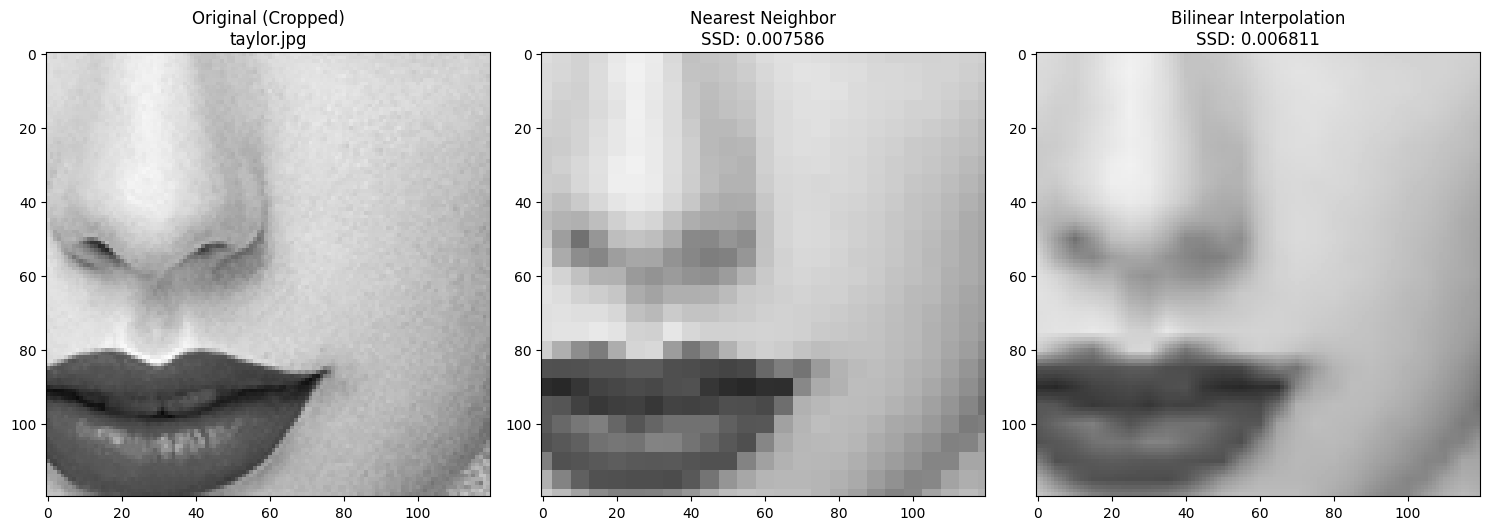

In [23]:
folder_path = r'D:\AI\Level 4\Semester 7\Machine Vision\Assignment 1\Point-Operations-and-Spatial-Filtering\images_for_zooming\a1q5images'

image_pairs = [
    ('im01small.png', 'im01.png'),
    ('im02small.png', 'im02.png'),
    ('im03small.png', 'im03.png'),
    ('taylor_small.jpg', 'taylor.jpg')
]

print(f"Reading images from: {folder_path}")
print("-" * 75)
print(f"{'Image':<20} | {'Scale':<5} | {'SSD Nearest':<12} | {'SSD Bilinear':<12}")
print("-" * 75)

for small_file, large_file in image_pairs:
    path_small = os.path.join(folder_path, small_file)
    path_large = os.path.join(folder_path, large_file)

    # Read as Grayscale
    img_small = cv.imread(path_small, cv.IMREAD_GRAYSCALE)
    img_orig = cv.imread(path_large, cv.IMREAD_GRAYSCALE)

    if img_small is None:
        print(f"Skipping {small_file} - check filename!")
        continue

    # Calculate Scale
    scale_factor = img_orig.shape[1] / img_small.shape[1]

    # Perform Zooming
    zoom_nn = manual_zoom(img_small, scale_factor, method='nearest')
    zoom_bilinear = manual_zoom(img_small, scale_factor, method='bilinear')

    # Calculate Metrics
    ssd_nn = compute_normalized_ssd(img_orig, zoom_nn)
    ssd_bilinear = compute_normalized_ssd(img_orig, zoom_bilinear)

    print(f"{small_file:<20} | {scale_factor:<5.1f} | {ssd_nn:<12.6f} | {ssd_bilinear:<12.6f}")

    # --- Visualization ---
    if small_file == 'taylor_small.jpg':
        fig, ax = plt.subplots(1, 3, figsize=(15, 5))
        
        # Center Crop
        h, w = img_orig.shape
        cy, cx = h // 2, w // 2
        S = 60 # Crop size
        sl_y, sl_x = slice(cy - S, cy + S), slice(cx - S, cx + S)

        ax[0].imshow(img_orig[sl_y, sl_x], cmap='gray', vmin=0, vmax=255)
        ax[0].set_title(f'Original (Cropped)\n{large_file}')
        
        ax[1].imshow(zoom_nn[sl_y, sl_x], cmap='gray', vmin=0, vmax=255)
        ax[1].set_title(f'Nearest Neighbor\nSSD: {ssd_nn:.6f}')
        
        ax[2].imshow(zoom_bilinear[sl_y, sl_x], cmap='gray', vmin=0, vmax=255)
        ax[2].set_title(f'Bilinear Interpolation\nSSD: {ssd_bilinear:.6f}')
        
        plt.tight_layout()
        plt.show()